In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

C:\Users\heman\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
start = '2014-01-24'
end = '2024-01-24'
stock = 'SBIN.NS'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-24,164.899994,166.490005,161.800003,162.119995,147.695206,16616560
1,2014-01-27,159.789993,160.399994,158.304993,159.449997,145.262787,15688040
2,2014-01-28,160.304993,162.800003,157.824997,159.630005,145.426743,18296910
3,2014-01-29,161.300003,162.179993,157.000000,157.365005,143.363312,17594550
4,2014-01-30,155.500000,155.800003,151.005005,151.660004,138.165894,20955320
...,...,...,...,...,...,...,...
2460,2024-01-17,624.000000,636.799988,623.000000,626.000000,626.000000,30016308
2461,2024-01-18,625.799988,633.450012,619.049988,628.299988,628.299988,14695436
2462,2024-01-19,633.000000,635.500000,624.700012,627.750000,627.750000,11675202
2463,2024-01-22,627.750000,627.750000,627.750000,627.750000,627.750000,0


In [5]:
ma_100_days = data.Close.rolling(100).mean()

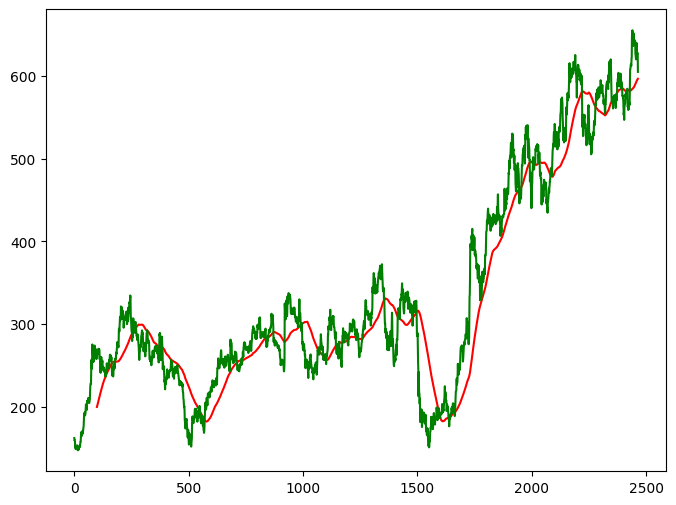

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

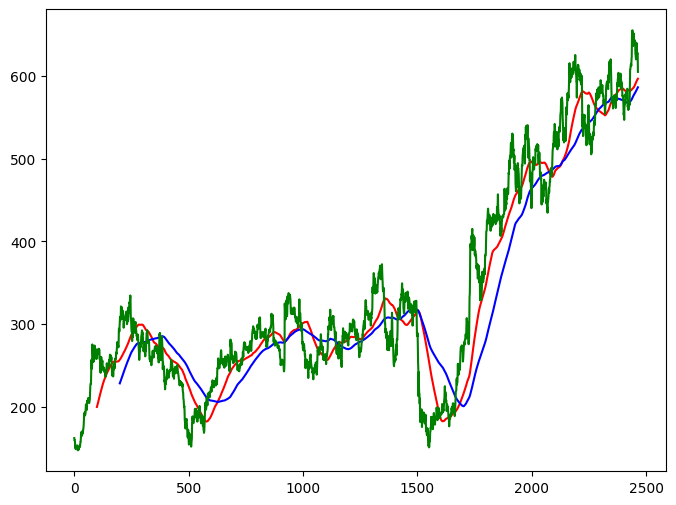

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

1972

In [12]:
data_test.shape[0]

493

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50

59/59 [==============================] - 10s 107ms/step - loss: 0.0361
Epoch 2/50
59/59 [==============================] - 6s 102ms/step - loss: 0.0087
Epoch 3/50
59/59 [==============================] - 9s 146ms/step - loss: 0.0071
Epoch 4/50
59/59 [==============================] - 8s 138ms/step - loss: 0.0074
Epoch 5/50
59/59 [==============================] - 8s 137ms/step - loss: 0.0072
Epoch 6/50
59/59 [==============================] - 8s 131ms/step - loss: 0.0060
Epoch 7/50
59/59 [==============================] - 7s 114ms/step - loss: 0.0051
Epoch 8/50
59/59 [==============================] - 7s 111ms/step - loss: 0.0050
Epoch 9/50
59/59 [==============================] - 6s 105ms/step - loss: 0.0054
Epoch 10/50
59/59 [==============================] - 9s 158ms/step - loss: 0.0047
Epoch 11/50
59/59 [==============================] - 8s 140ms/step - loss: 0.0045
Epoch 12/50
59/59 [==============================] - 7s 119ms/step - loss: 0.0045
Epoch 13/50
59/59 [====

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

16/16 [==============================] - 1s 35ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

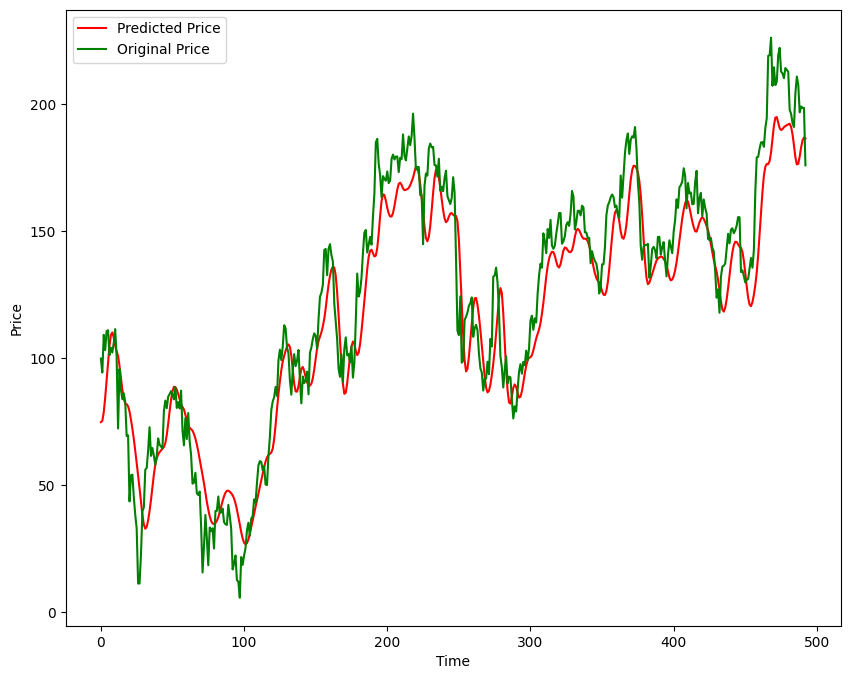

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')